# Apple Stocks csv

In [2]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('aapl.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Get a summary of the dataset
print("\nDataset summary:")
print(data.info())

# Display basic statistics of the numerical columns
print("\nBasic statistics of numerical columns:")
print(data.describe())


First 5 rows of the dataset:
         Date    Open    High     Low   Close    Volume  Adj Close
0  2008-10-14  116.26  116.40  103.14  104.08  70749800     104.08
1  2008-10-13  104.55  110.53  101.02  110.26  54967000     110.26
2  2008-10-10   85.70  100.00   85.00   96.80  79260700      96.80
3  2008-10-09   93.35   95.80   86.60   88.74  57763700      88.74
4  2008-10-08   85.91   96.33   85.68   89.79  78847900      89.79

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6081 entries, 0 to 6080
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6081 non-null   object 
 1   Open       6081 non-null   float64
 2   High       6081 non-null   float64
 3   Low        6081 non-null   float64
 4   Close      6081 non-null   float64
 5   Volume     6081 non-null   int64  
 6   Adj Close  6081 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 332.7+ KB
None

Basic statistic

## Linear Regression 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for regression
X = data[['Open', 'High', 'Low', 'Volume', 'Adj Close']]  # Exclude 'Close' from features
y = data['Close']  # Predicting the 'Close' stock price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 0.44098492788284843
R-squared: 0.9996584726063164


## Visualization

### Matplotlib

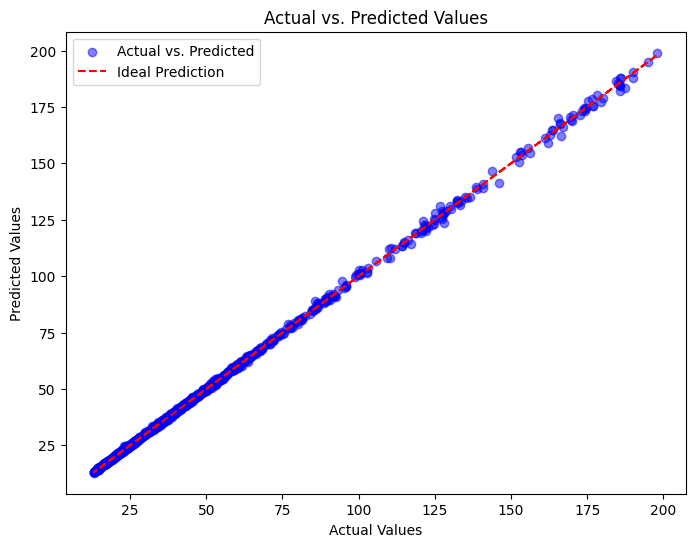

In [7]:
import matplotlib.pyplot as plt

# Assuming 'predictions' and 'y_test' are obtained from the regression model

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted', alpha=0.5)
plt.plot(y_test, y_test, color='red', label='Ideal Prediction', linestyle='--')  # Plotting ideal prediction line (y = x)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


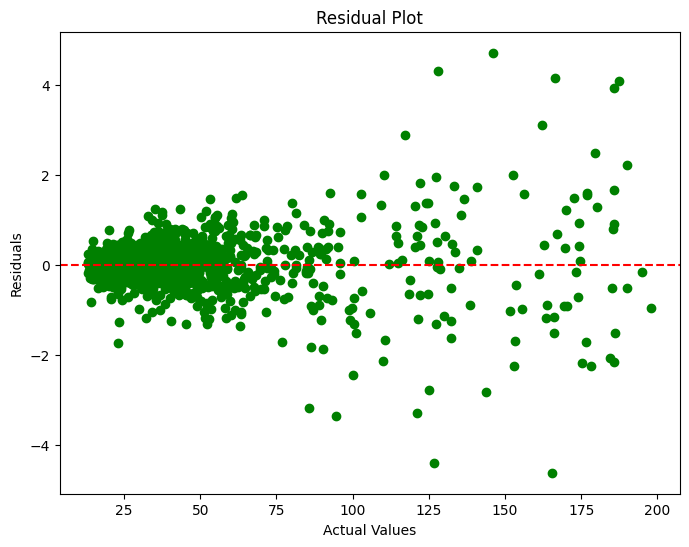

In [6]:
residuals = y_test - predictions

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='green')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


## Seaborn

### Pariplot

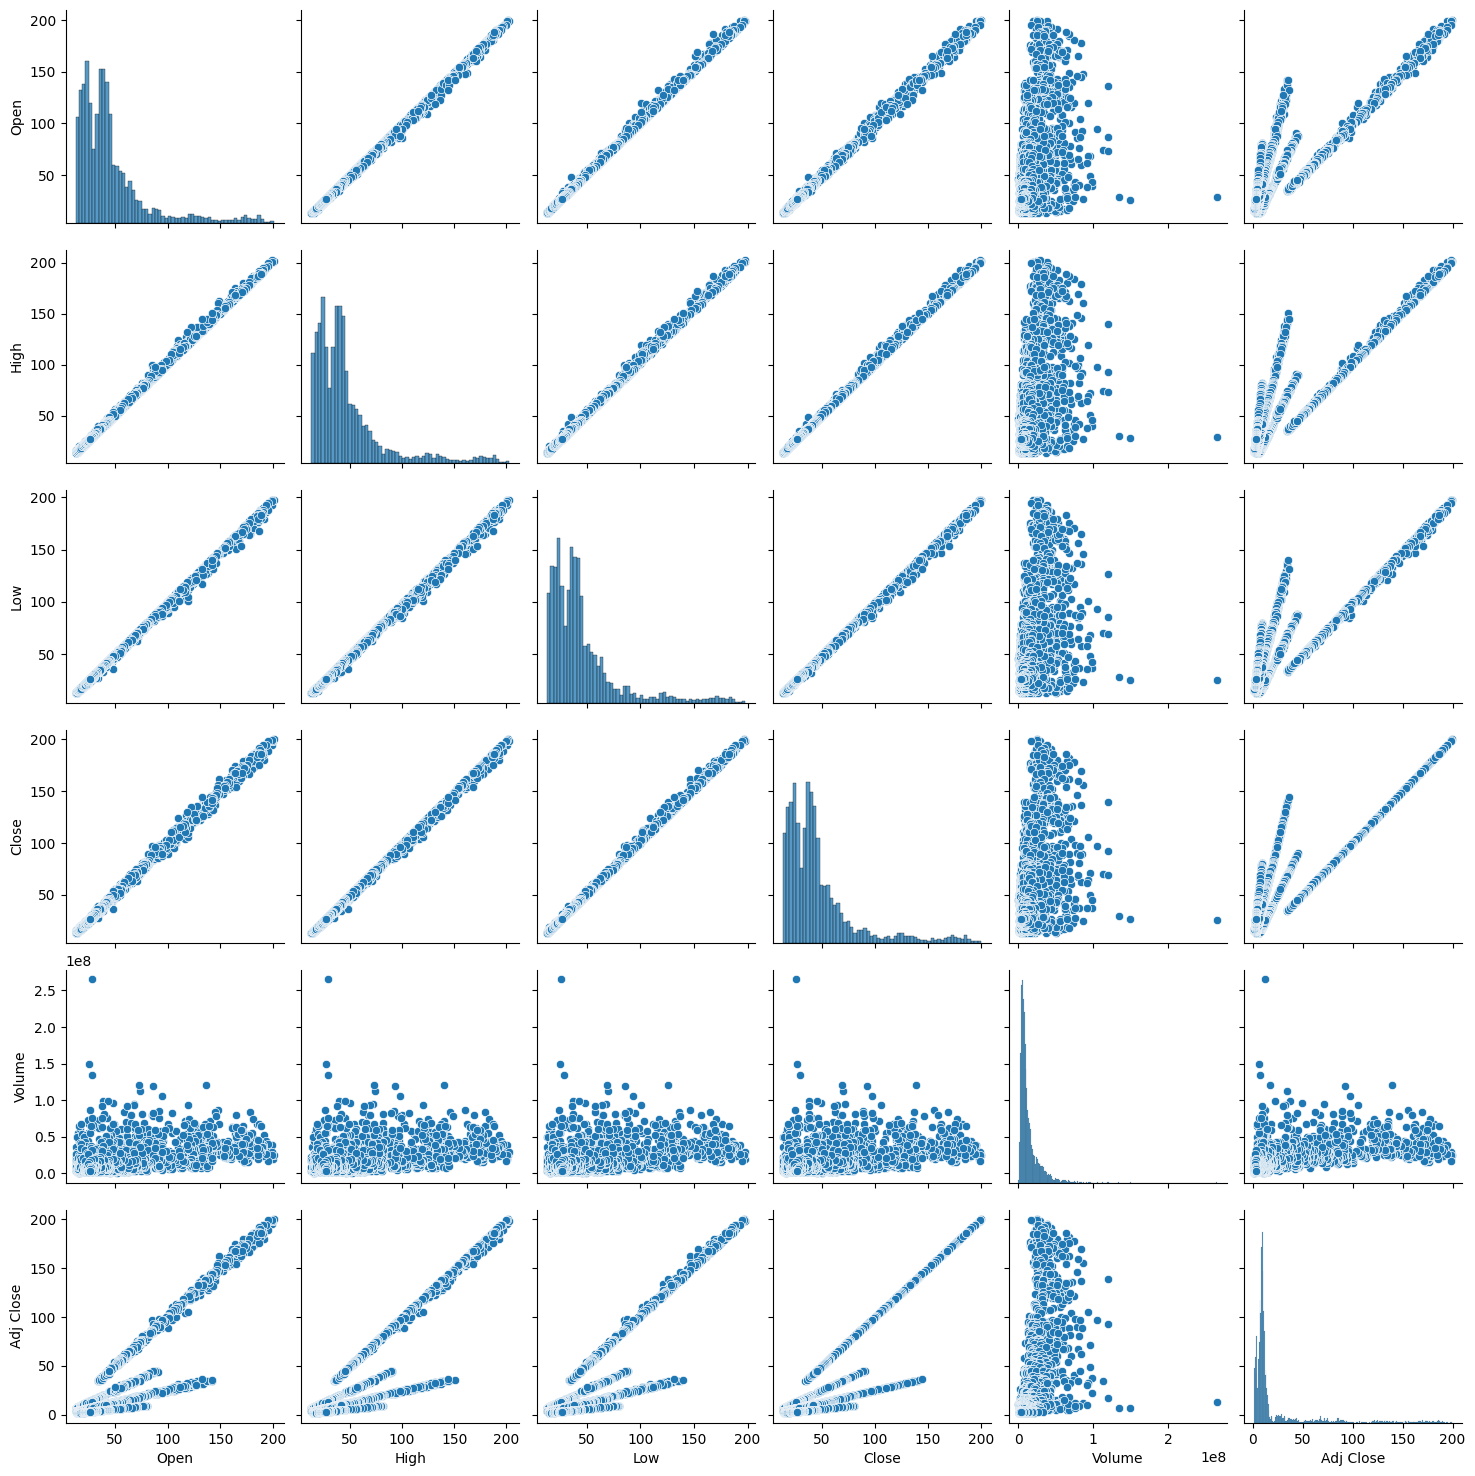

In [8]:
import seaborn as sns
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('aapl.csv')

# Display pairwise relationships with a pairplot
sns.pairplot(data)
plt.show()


### Line Plot

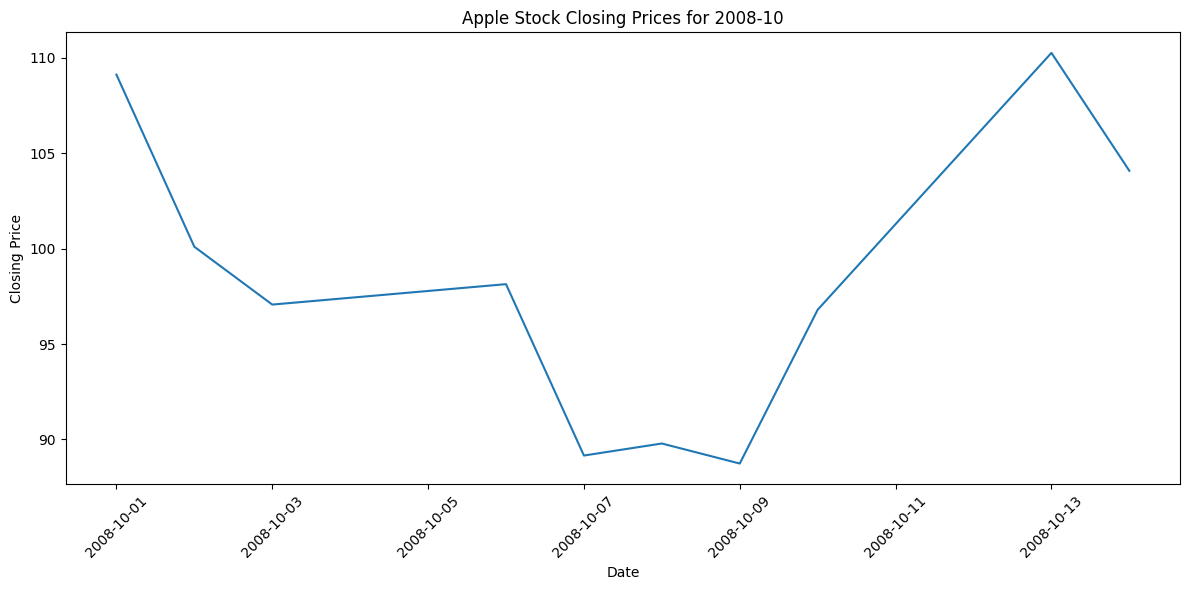

In [17]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for a specific year and month (e.g., 2008-10)
specific_date = '2008-10-14'
year_month_data = data[data['Date'].dt.strftime('%Y-%m') == specific_date[:7]]

# Plotting the line plot for the specific year and month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=year_month_data)
plt.title(f'Apple Stock Closing Prices for {specific_date[:7]}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Heatmap 

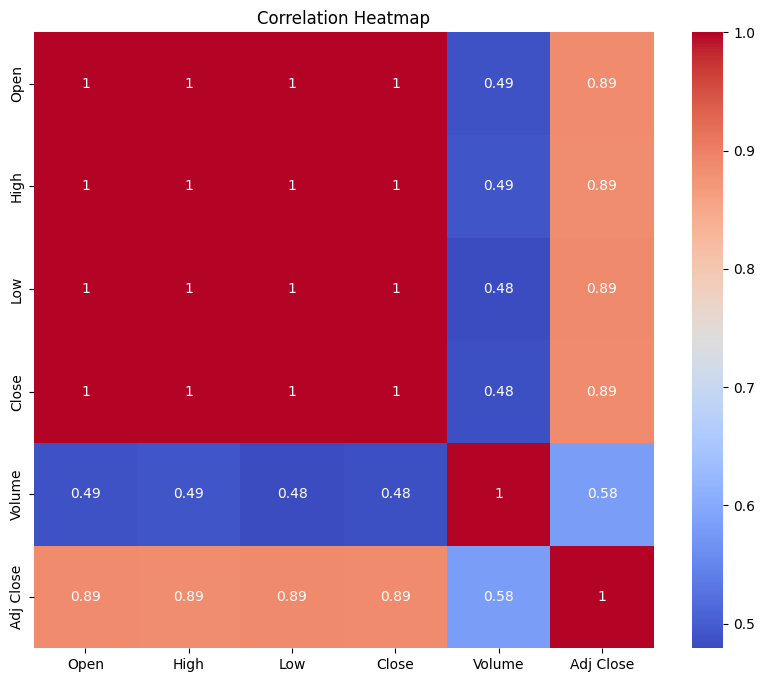

In [11]:
# Exclude the 'Date' column for the heatmap
numerical_data = data.drop('Date', axis=1)

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
correlation = numerical_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### More in depth Visualiations 

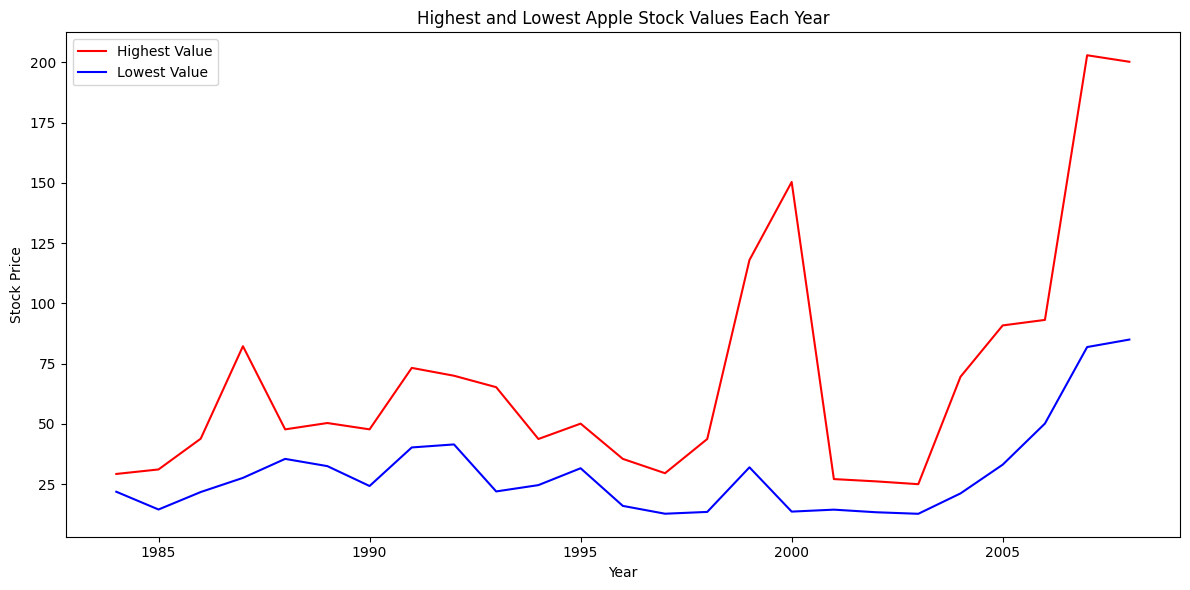

In [18]:
# Extracting year from the date
data['Year'] = data['Date'].dt.year

# Grouping data by year and finding the highest and lowest values for each year
highest_values = data.groupby('Year')['High'].max()
lowest_values = data.groupby('Year')['Low'].min()

# Plotting the highest and lowest values for each year
plt.figure(figsize=(12, 6))

sns.lineplot(x=highest_values.index, y=highest_values.values, color='red', label='Highest Value')
sns.lineplot(x=lowest_values.index, y=lowest_values.values, color='blue', label='Lowest Value')

plt.title('Highest and Lowest Apple Stock Values Each Year')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_73439/565571713.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




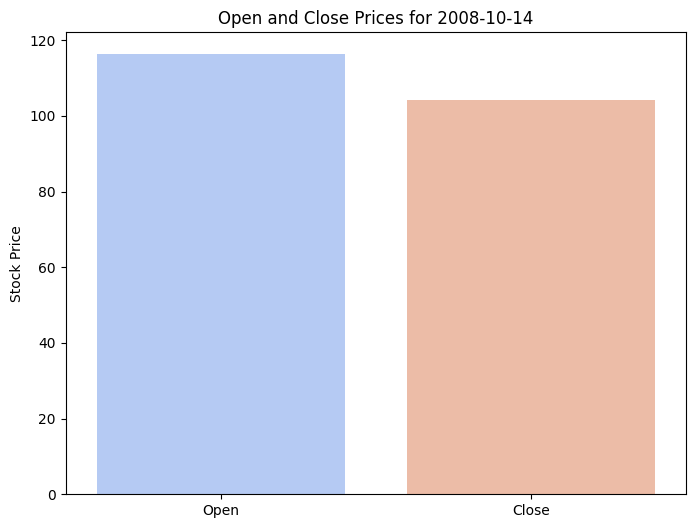

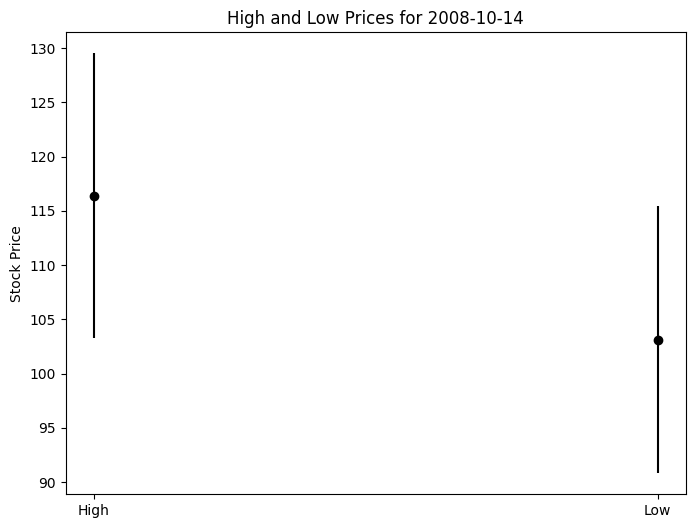

In [21]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for the specified date ('2008-10-14')
specific_date = '2008-10-14'
date_data = data[data['Date'].dt.strftime('%Y-%m-%d') == specific_date]

# Plotting the Open and Close prices
plt.figure(figsize=(8, 6))
sns.barplot(x=['Open', 'Close'], y=[date_data['Open'].values[0], date_data['Close'].values[0]], palette='coolwarm')
plt.title(f'Open and Close Prices for {specific_date}')
plt.ylabel('Stock Price')
plt.show()

# Plotting the High and Low prices using error bars
plt.figure(figsize=(8, 6))
plt.errorbar(x=['High', 'Low'], y=[date_data['High'].values[0], date_data['Low'].values[0]],
             yerr=[[date_data['Open'].values[0] - date_data['Low'].values[0], date_data['High'].values[0] - date_data['Close'].values[0]]], fmt='o', color='black')
plt.title(f'High and Low Prices for {specific_date}')
plt.ylabel('Stock Price')
plt.show()

/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_73439/1497179195.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



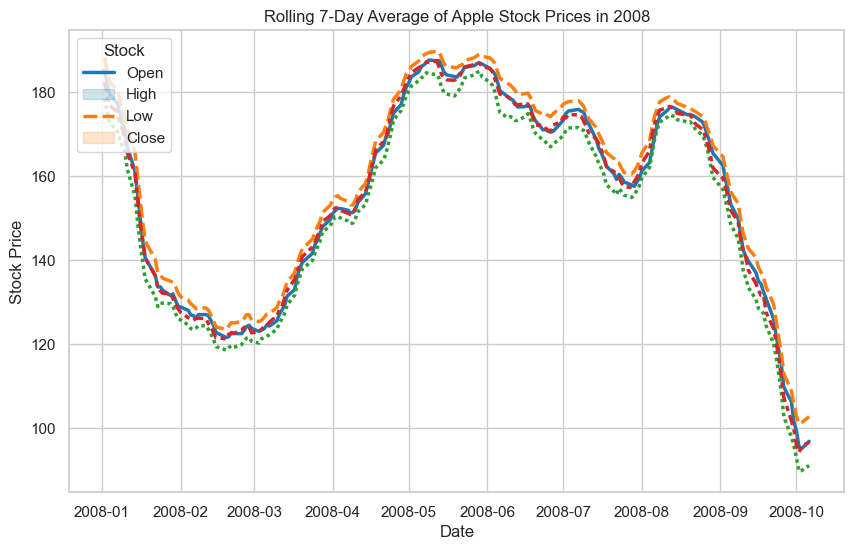

In [27]:
# Load the data from the CSV file
data = pd.read_csv('aapl.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for the year 2008
data_2008 = data[data['Date'].dt.year == 2008]

# Set 'Date' column as the index
data_2008.set_index('Date', inplace=True)

# Convert relevant columns to numeric if they aren't already
data_2008[['Open', 'High', 'Low', 'Close']] = data_2008[['Open', 'High', 'Low', 'Close']].apply(pd.to_numeric, errors='coerce')

# Compute rolling average for the stock prices in 2008
rolling_avg_2008 = data_2008[['Open', 'High', 'Low', 'Close']].rolling(7).mean()

# Set the seaborn style
sns.set_theme(style="whitegrid")

# Plotting the rolling average for Apple stock prices in 2008
plt.figure(figsize=(10, 6))
sns.lineplot(data=rolling_avg_2008, palette="tab10", linewidth=2.5)

plt.title('Rolling 7-Day Average of Apple Stock Prices in 2008')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(title='Stock', loc='upper left', labels=['Open', 'High', 'Low', 'Close'])  # Adjust labels if needed
plt.show()